# Importing Packages

In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import *

# Loading Data 

In [3]:
df = pd.read_csv('DataSet/Steel_industry.csv', skipinitialspace=True)
df

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,01-01-2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01-01-2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01-01-2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01-01-2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01-01-2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35036,31-12-2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31-12-2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31-12-2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,31-12-2018 00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             35041 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 4   CO2(tCO2)                             35041 non-null  float64
 5   Lagging_Current_Power_Factor          35041 non-null  float64
 6   Leading_Current_Power_Factor          35041 non-null  float64
 7   NSM                                   35041 non-null  int64  
 8   WeekStatus                            35041 non-null  object 
 9   Day_Of_Week                           35041 non-null  object 
 10  Load_Type                             35041 non-null  object 
dtypes: float64(6), 

In [5]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], format = "%d-%m-%Y %H:%M")
df

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load
35039,2018-12-31 00:00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,Weekday,Monday,Light_Load


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date_Time                             35041 non-null  datetime64[ns]
 1   Usage_kWh                             35041 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64       
 4   CO2(tCO2)                             35041 non-null  float64       
 5   Lagging_Current_Power_Factor          35041 non-null  float64       
 6   Leading_Current_Power_Factor          35041 non-null  float64       
 7   NSM                                   35041 non-null  int64         
 8   WeekStatus                            35041 non-null  object        
 9   Day_Of_Week                           35041 non-null  object        
 10

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Date_Time                               0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_Of_Week                             0
Load_Type                               0
dtype: int64

# Label Encoding

In [9]:
le = LabelEncoder()

In [10]:
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = le.fit_transform(df[i])

In [11]:
df

,Date_Time,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_Of_Week,Load_Type
0,2018-01-01 00:15:00,3.17,2.95,0.00,0.0,73.21,100.00,900,0,1,0
1,2018-01-01 00:30:00,4.00,4.46,0.00,0.0,66.77,100.00,1800,0,1,0
2,2018-01-01 00:45:00,3.24,3.28,0.00,0.0,70.28,100.00,2700,0,1,0
3,2018-01-01 01:00:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,0,1,0
4,2018-01-01 01:15:00,3.82,4.50,0.00,0.0,64.72,100.00,4500,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
35036,2018-12-31 23:15:00,3.74,3.74,0.00,0.0,70.71,100.00,83700,0,1,0
35037,2018-12-31 23:30:00,3.78,3.17,0.07,0.0,76.62,99.98,84600,0,1,0
35038,2018-12-31 23:45:00,3.78,3.06,0.11,0.0,77.72,99.96,85500,0,1,0
35039,2018-12-31 00:00:00,3.67,3.02,0.07,0.0,77.22,99.98,0,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Date_Time                             35041 non-null  datetime64[ns]
 1   Usage_kWh                             35041 non-null  float64       
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64       
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64       
 4   CO2(tCO2)                             35041 non-null  float64       
 5   Lagging_Current_Power_Factor          35041 non-null  float64       
 6   Leading_Current_Power_Factor          35041 non-null  float64       
 7   NSM                                   35041 non-null  int64         
 8   WeekStatus                            35041 non-null  int32         
 9   Day_Of_Week                           35041 non-null  int32         
 10

# Visualization

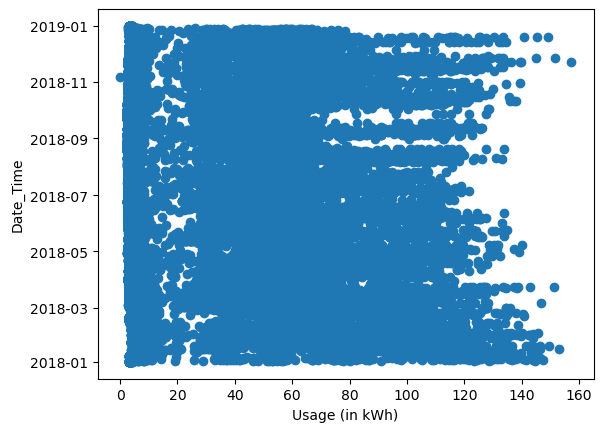

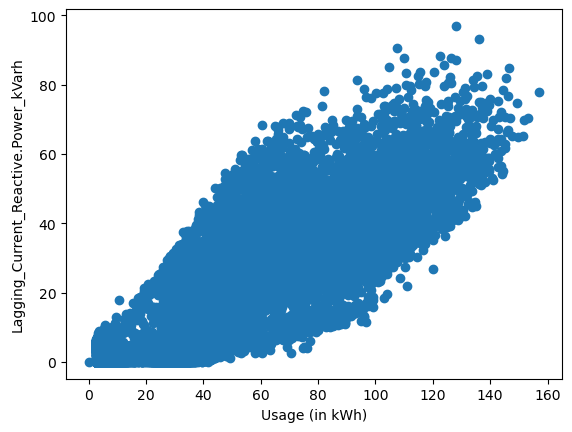

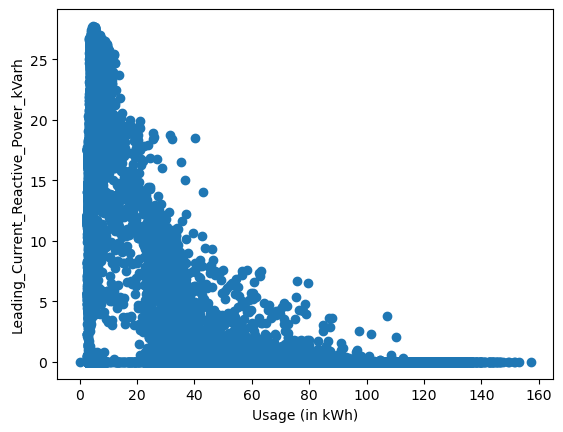

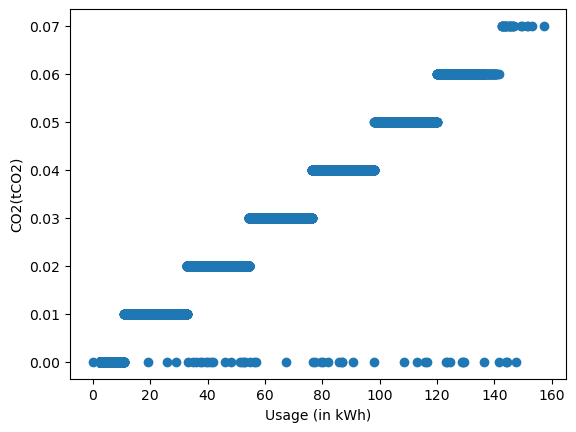

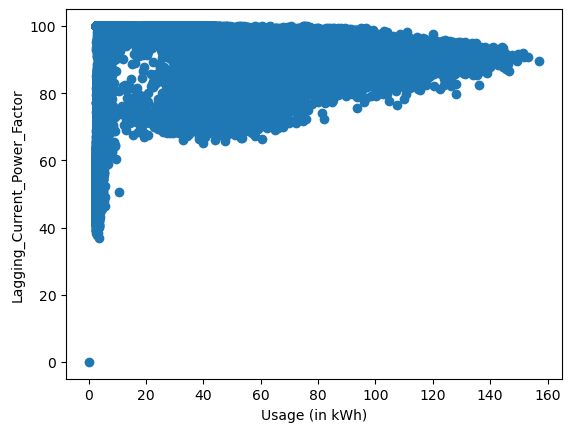

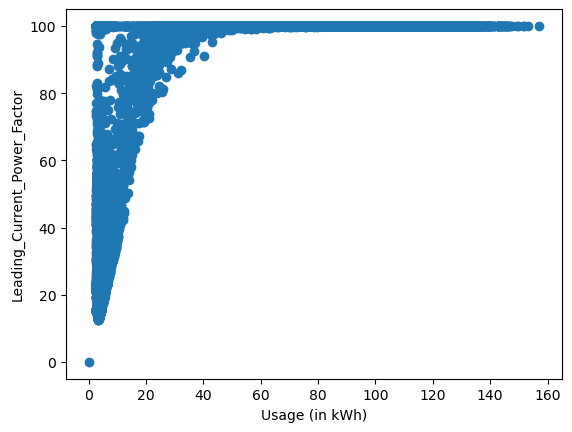

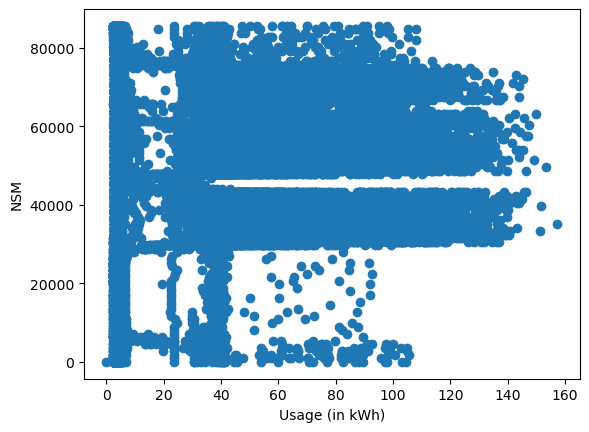

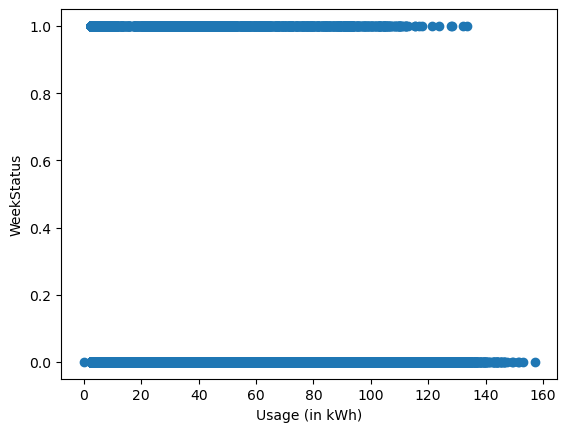

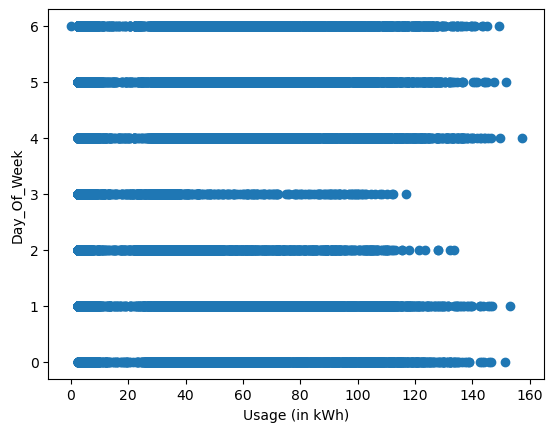

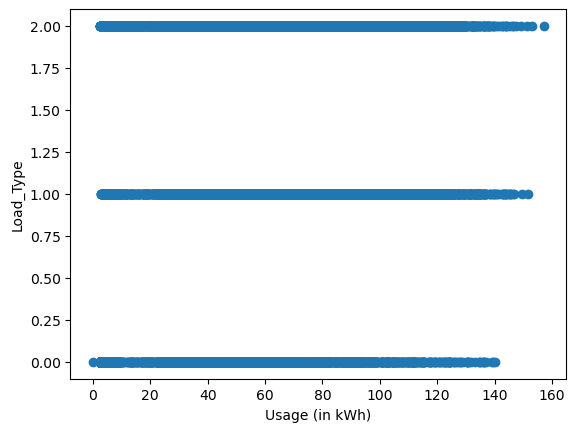

In [13]:
for i in df.columns:
    if i != 'Usage_kWh':
        plt.scatter(x = df['Usage_kWh'], y = df[i])
        plt.xlabel('Usage (in kWh)')
        plt.ylabel(i)
        plt.show()

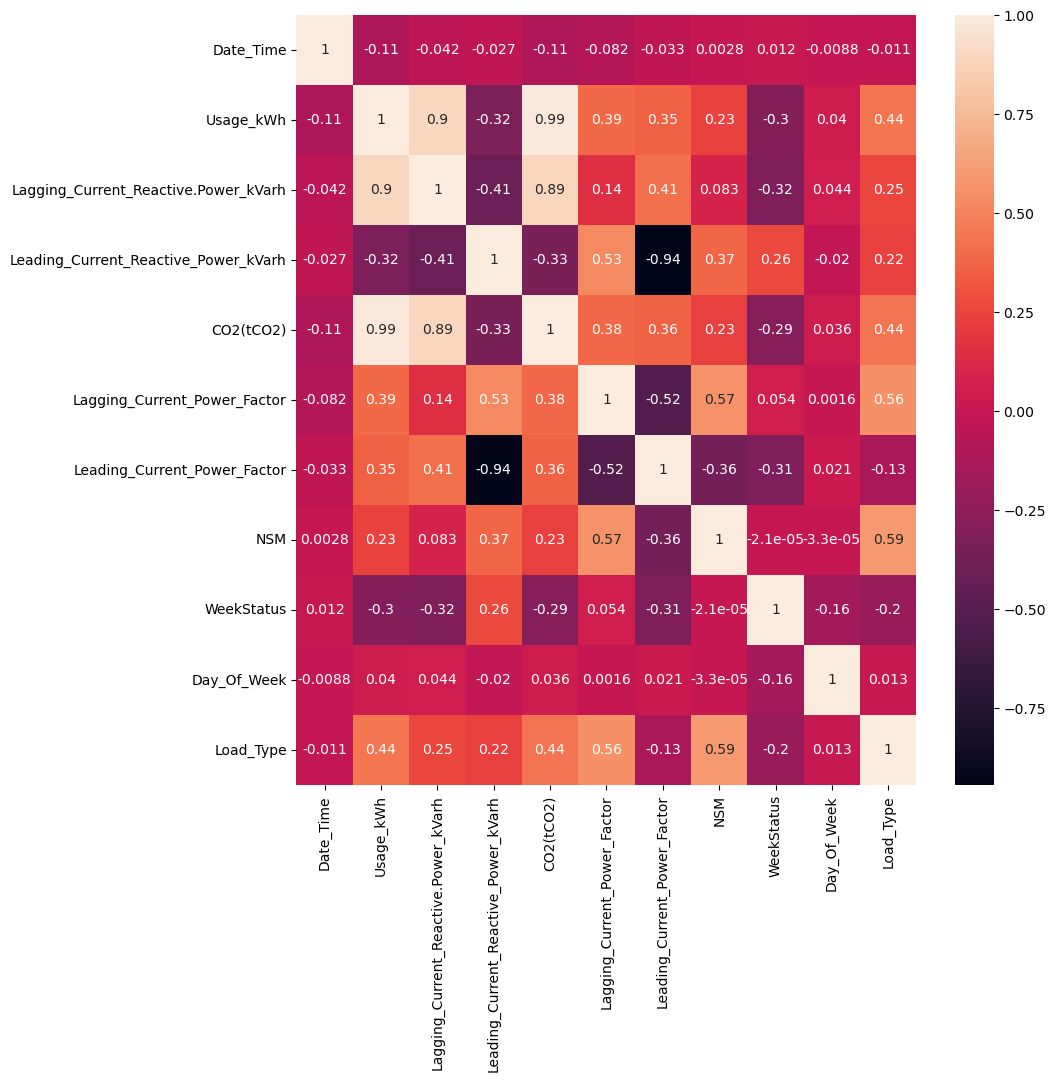

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, color = 'red')
plt.show()

In [15]:
df = df.drop(['Date_Time'], axis = 1)

# Data Split

In [16]:
x = df.drop(['Usage_kWh'], axis = 1)
y = df['Usage_kWh']

In [17]:
df.shape

(35041, 10)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75, random_state=10)

In [19]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(26280, 9)
(8761, 9)
(26280,)
(8761,)


# Feature Selection and Model Building

In [20]:
model = DecisionTreeRegressor(random_state = 10, max_depth= 5)

In [21]:
rfe = RFE(model,n_features_to_select=6)
rfe.fit(x,y)

RFE(estimator=DecisionTreeRegressor(max_depth=5, random_state=10),
    n_features_to_select=6)

In [22]:
rfe.support_

array([ True, False,  True,  True,  True,  True, False, False,  True])

In [23]:
rfe_df = pd.DataFrame()
rfe_df['Features'] = x.columns
rfe_df['Support'] = rfe.support_
rfe_df['Ranking'] = rfe.ranking_
rfe_df

,Features,Support,Ranking
0,Lagging_Current_Reactive.Power_kVarh,True,1
1,Leading_Current_Reactive_Power_kVarh,False,2
2,CO2(tCO2),True,1
3,Lagging_Current_Power_Factor,True,1
4,Leading_Current_Power_Factor,True,1
5,NSM,True,1
6,WeekStatus,False,4
7,Day_Of_Week,False,3
8,Load_Type,True,1


In [24]:
col = x.columns[rfe_df['Support']==True]
col

Index(['Lagging_Current_Reactive.Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'Load_Type'],
      dtype='object')

In [25]:
x_train = x_train[col]
x_test = x_test[col]
print(x_train.shape)
print(x_test.shape)

(26280, 6)
(8761, 6)


In [26]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [27]:
y_pred = model.predict(x_test)

# Measuring Model Performance

In [28]:
print('MAE:',mean_absolute_error(y_test,y_pred))

MAE: 2.230563765214736


In [29]:
print('MSE:',mean_squared_error(y_test,y_pred))

MSE: 13.674193823235587


In [30]:
print('RMSE:', np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE: 3.697863413274696


In [31]:
print(r2_score(y_test,y_pred))

0.9881060745377415
